In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
# Create a function to import and preprocess that image to be able to be used with our model
def load_and_prep_image(file_name, image_shape=224):
  """
  Reads an image from file name, turns it into a tensor and reshapes it into (img_shape, image_shape, color_chanels)
  """
  # Read an image 
  img = tf.io.read_file(file_name)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=(image_shape, image_shape))
  # Rescale the image (normalize)
  img = img/255

  return img

In [5]:
def predict(model, class_names, file_name):
  img = load_and_prep_image(file_name)
  predict = model.predict(tf.expand_dims(img, axis=0))
  if len(predict[0])>1:
    predicted_class = class_names[tf.argmax(predict[0])]
  else:
    predicted_class = class_names[int(tf.round(predict[0]))]
  # print(predict, int(tf.round(predict)))
  plt.figure(figsize=(8,8))
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class}")
  plt.axis(False)
  plt.show()

In [14]:
input_layer_shape = (224, 224, 3)
drive_weights_path = "/content/drive/My Drive/Tensorflow Certificate Exam/Weights/trained_model_11.h5"
# imagenet_labels_file_path = "/content/drive/My Drive/VGG16 Visualization/imagenet_class_index.json"
num_classes = 10
class_names = ['chicken_curry','chicken_wings','fried_rice','grilled_salmon','hamburger','ice_cream','pizza','ramen','steak','sushi']

# Part 1 - Predictions from a model

## Load model

In [10]:
trained_model = load_model(drive_weights_path)

In [11]:
trained_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_0 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 28090)            

## Download somefile

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [16]:
files_test = ["03-hamburger.jpeg", "03-pizza-dad.jpeg", "03-steak.jpeg", "03-sushi.jpeg"]

## Predict some image

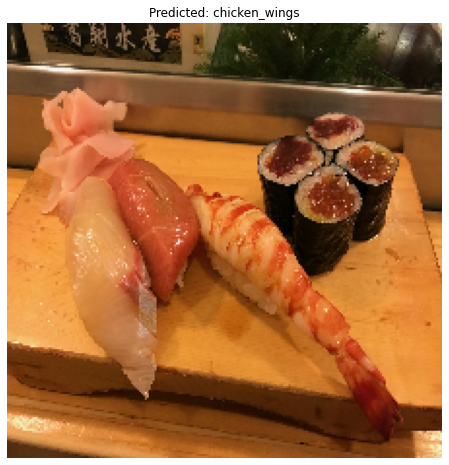

In [20]:
predict(trained_model, class_names, files_test[3])

# Part 2 - Feature extract and visualize

In [39]:
img = load_and_prep_image(files_test[2])
feature_maps = trained_model.predict(tf.expand_dims(img, axis=0))

In [41]:
feature_maps, len(feature_maps)

(array([[0.03836437, 0.03694844, 0.07427597, 0.21882056, 0.09983558,
         0.09288187, 0.00442999, 0.06089783, 0.33104622, 0.04249922]],
       dtype=float32), 1)

In [66]:
layer_names = [layer._name for layer in trained_model.layers]

In [67]:
layer_names

['conv2d_0',
 'conv2d_1',
 'max_pooling2d_2',
 'conv2d_3',
 'conv2d_4',
 'max_pooling2d_5',
 'flatten_6',
 'dense_7']

In [30]:
%matplotlib inline

In [53]:
# Get list of layers from model
layer_outputs = [layer.output for layer in trained_model.layers[:]]

In [54]:
# Create a visualization model
visualize_model = tf.keras.models.Model(inputs = trained_model.input, outputs = layer_outputs)

In [68]:
img = load_and_prep_image(files_test[2])
feature_maps = visualize_model.predict(tf.expand_dims(img, axis=0))

In [62]:
len(feature_maps)

8

In [47]:
import numpy as np

(1, 222, 222, 10)
(1, 220, 220, 10)
(1, 110, 110, 10)
(1, 108, 108, 10)
(1, 106, 106, 10)
(1, 53, 53, 10)
(1, 28090)
(1, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


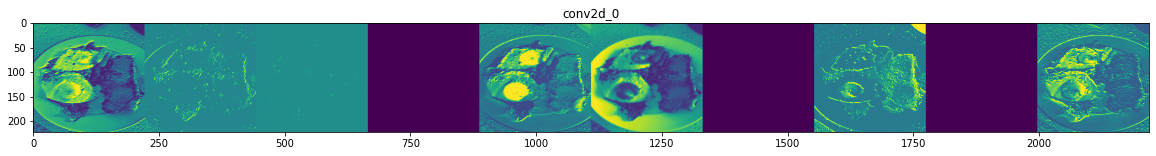

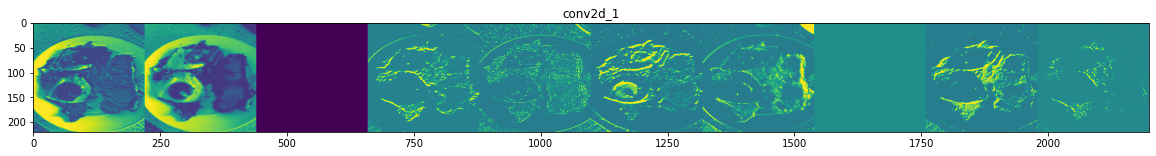

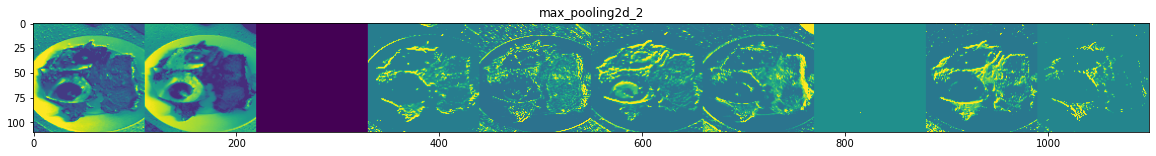

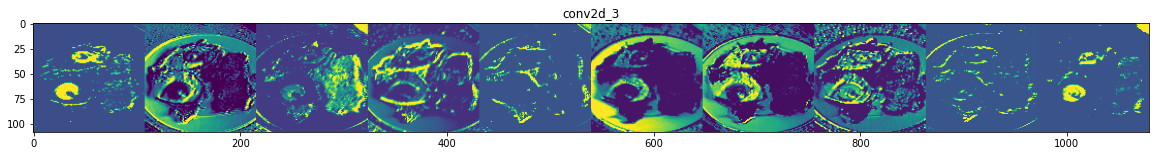

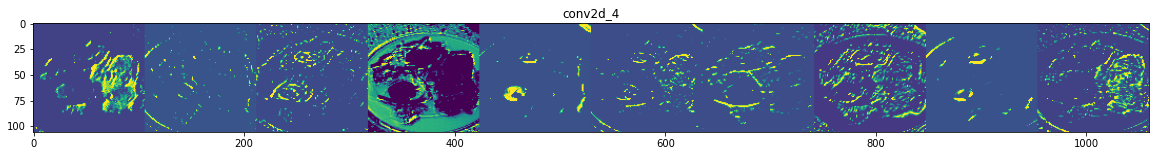

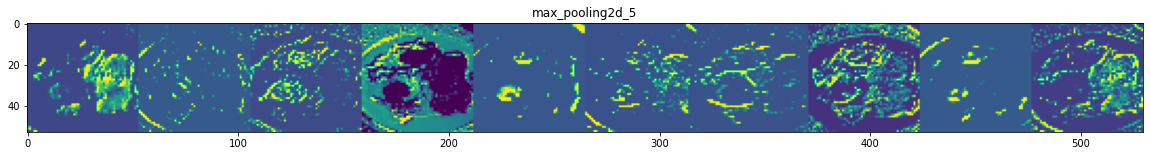

In [69]:
# Plotting the graph
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')